<a href="https://colab.research.google.com/github/SHAZAN01/Machine-Learning/blob/main/SVR_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Learning Objective -SVR**

### Objectives of SVR-Lab
In this notebook, we will be exploring a dataset containing information about individual patients, including their age, sex, body mass index (BMI), number of children, smoking status, and region. Our goal is to use this information to predict the amount of money a patient will spend on hospital charges. We will start by performing exploratory data analysis (EDA) to understand the distribution of the data and identify any patterns or trends. Next, we will preprocess the data to prepare it for modeling. We will then use linear regression to build a model to predict hospital charges. Finally, we will evaluate the performance of our model and visualize the results. Throughout the notebook, we will use various techniques such as visualizations, statistical analysis and data preprocessing to uncover insights and build a robust model."

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [ ]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [ ]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
df = df.rename(columns = {'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


## Exploratory Analysis

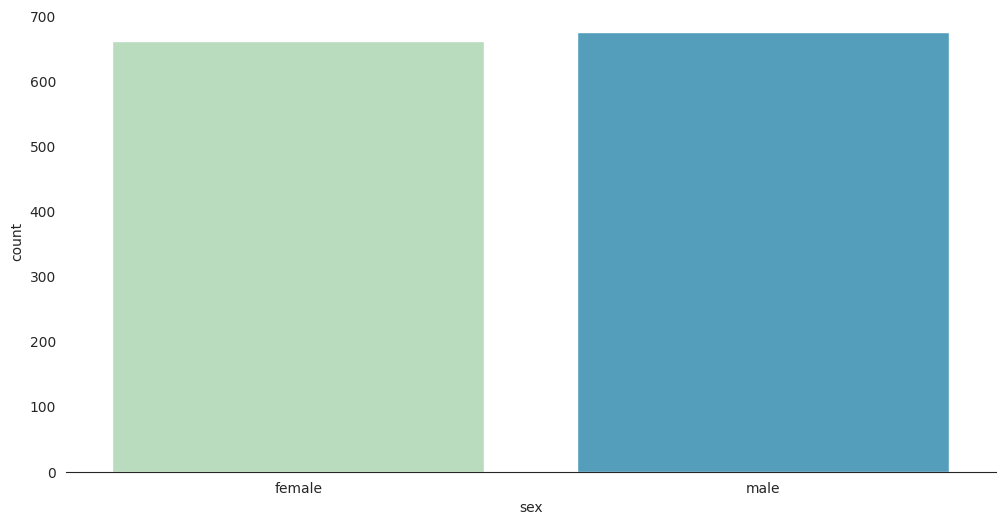

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

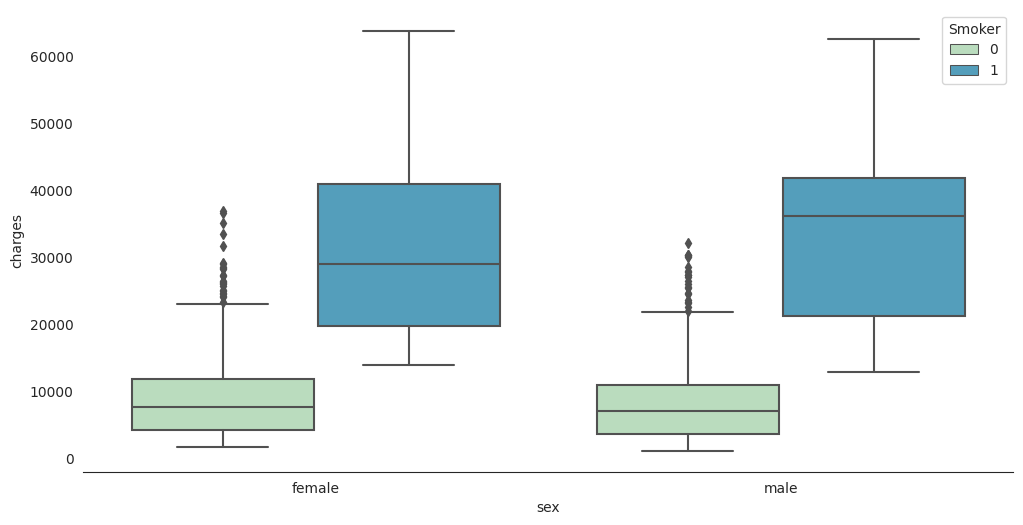

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

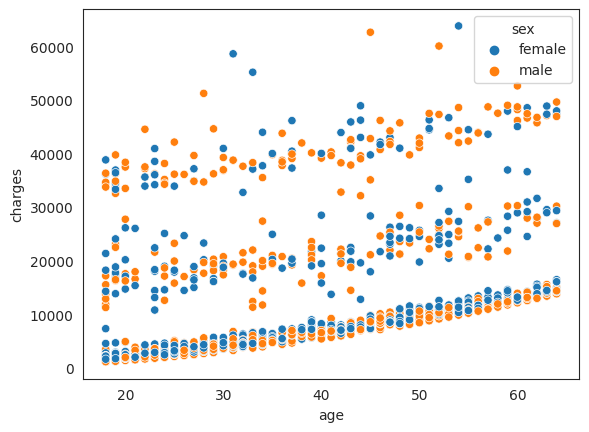

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<Axes: xlabel='age', ylabel='charges'>

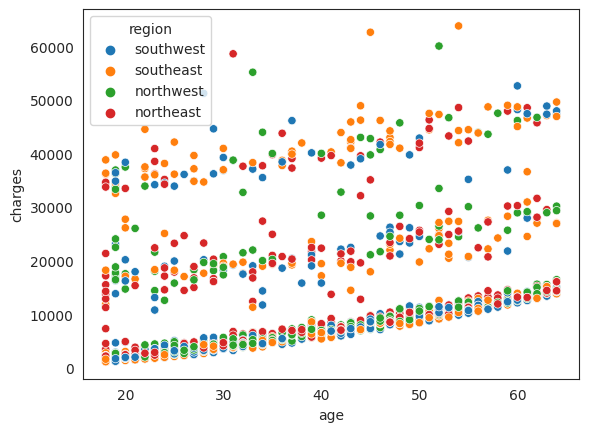

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<Axes: xlabel='age', ylabel='charges'>

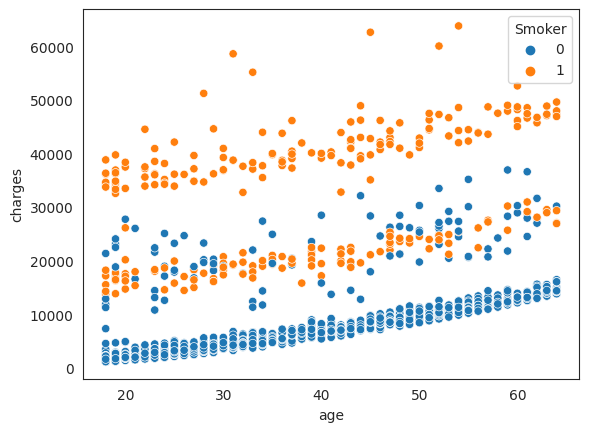

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

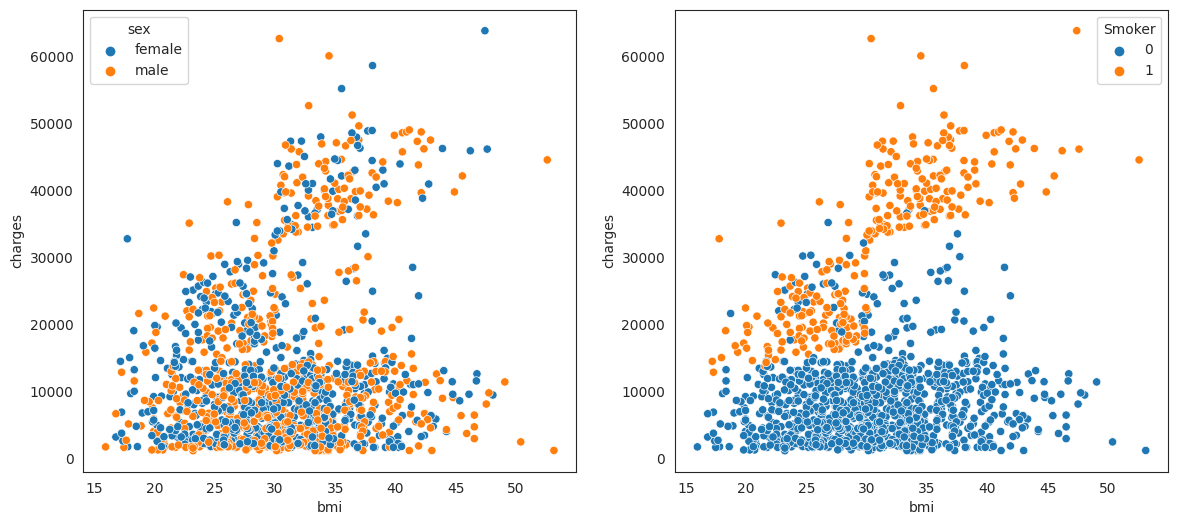

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<Axes: xlabel='bmi', ylabel='charges'>

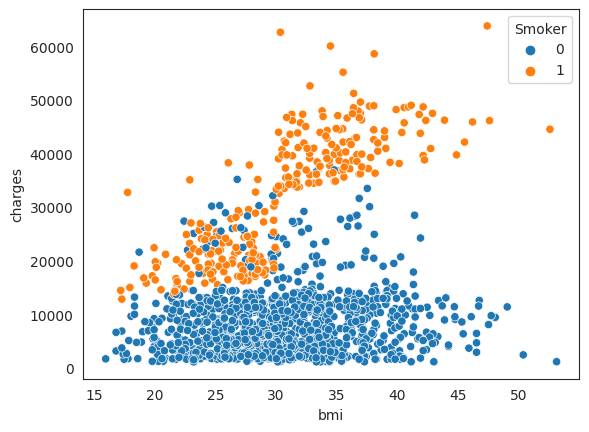

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [ ]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<Axes: >

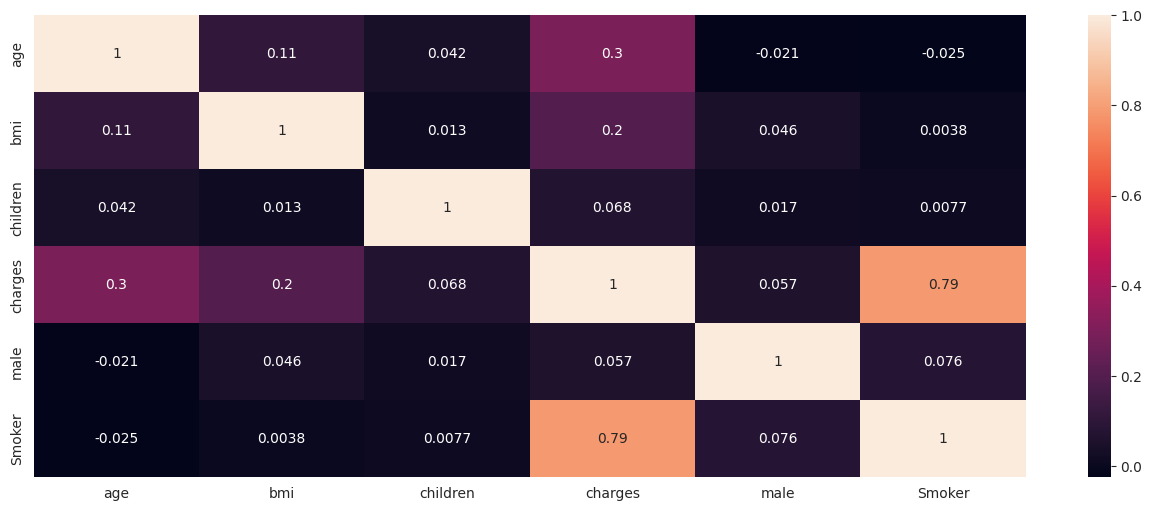

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

## Splitting the data

In [ ]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [ ]:
x_train.shape

(802, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Support vector regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(predict,y_test)
mse=mean_squared_error(predict,y_test)
mae=mean_absolute_error(predict,y_test)
rmse=np.sqrt(mean_squared_error(predict,y_test))
print(r2,mse,mae,rmse)
rmse

-66811.70114292455 162177720.77017954 8307.362227542357 12734.90167885797


12734.90167885797

Text(0.5, 0, 'Predict')

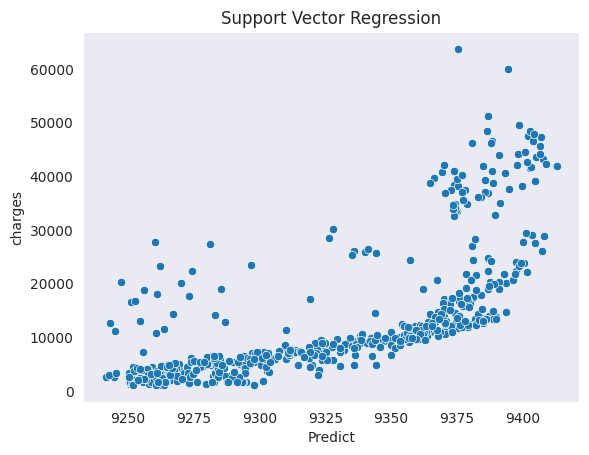

In [ ]:
sns.set_style('dark')
f = sns.scatterplot(x=predict,y=y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')